In [1]:
import numpy as np
import pandas as pd
from uncertainties import ufloat, unumpy, umath
import ldd
import statistics
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def linear_function(x,a,b):
    return a* x + b

C:\Users\flore\AppData\Local\Temp\ipykernel_3512\3828547266.py:39: RuntimeWarning: invalid value encountered in sqrt
  incer=np.diag(np.sqrt(pcov))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-0.06485359629916766 0.0012097285325098207


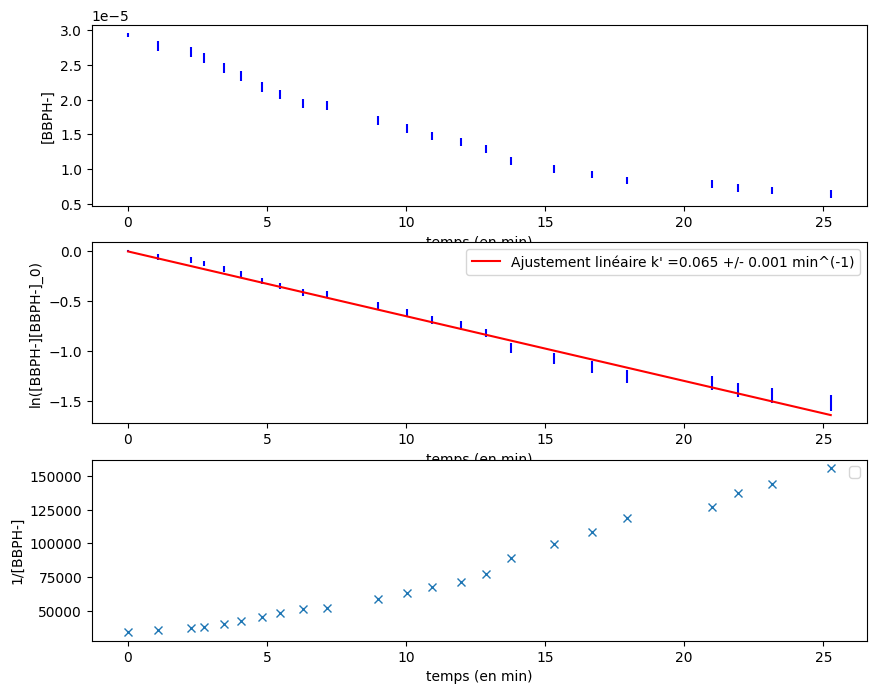

In [195]:
xls=pd.ExcelFile("DE0BB100.xls")
df1=pd.read_excel(xls,'1ere expérience ratée')
df2=pd.read_excel(xls,'Seconde expérience')

C=ufloat(2.93*10**(-5),0.03*10**(-5))

absorbance1=df1['Absorbance'].values
absorbance1=unumpy.uarray(absorbance1,0.02)

temps1=df1['temps'].values
t1=temps1/60
t1=unumpy.uarray(t1,2/60)

epsilon=absorbance1[0]/C

BBP=absorbance1/epsilon


fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(10,8))

ax1.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(BBP),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(BBP),fmt='None',ecolor='b')
ax2.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(unumpy.log(BBP/BBP[0])),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(unumpy.log(BBP)),fmt='None',ecolor='b')
ax3.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(1/BBP),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(unumpy.log(1/BBP)),fmt='x',ecolor='b')


ax1.set_xlabel('temps (en min)')
ax2.set_xlabel('temps (en min)')
ax3.set_xlabel('temps (en min)')

ax1.set_ylabel('[BBPH-]')
ax2.set_ylabel('ln([BBPH-][BBPH-]_0)')
ax3.set_ylabel('1/[BBPH-]')


param,pcov=curve_fit(linear_function,xdata=unumpy.nominal_values(t1),ydata=unumpy.nominal_values(unumpy.log(BBP/BBP[0])),sigma=unumpy.std_devs(unumpy.log(BBP)))
(kprime,b)=(param[0],param[1])


incer=np.diag(np.sqrt(pcov))
kincer=incer[0]
print(kprime,kincer)
ax2.plot(unumpy.nominal_values(t1),unumpy.nominal_values(kprime)*unumpy.nominal_values(t1),c='r',label=f'Ajustement linéaire k\' =0.065 +/- 0.001 min^(-1)')
ax2.legend()
plt.legend()
plt.savefig('3CourbesCinétiques.eps',format='eps',dpi=1000, bbox_inches='tight')
plt.show()

In [194]:
tableau=df1.to_latex(columns=('Absorbance','A x C_0/A0','tmin'),index=False,column_format='|c|c|c|',header=('$Absorbance \pm 0.02 $','Concentration en mol/L',"Temps \pm 0.033 en min"),float_format="%.8f")
f=open("TableauCinétique.txt",'w')
f.write(tableau)

C:\Users\flore\AppData\Local\Temp\ipykernel_3512\2629637745.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tableau=df1.to_latex(columns=('Absorbance','A x C_0/A0','tmin'),index=False,column_format='|c|c|c|',header=('$Absorbance \pm 0.02 $','Concentration en mol/L',"Temps \pm 0.033 en min"),float_format="%.8f")


1923

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


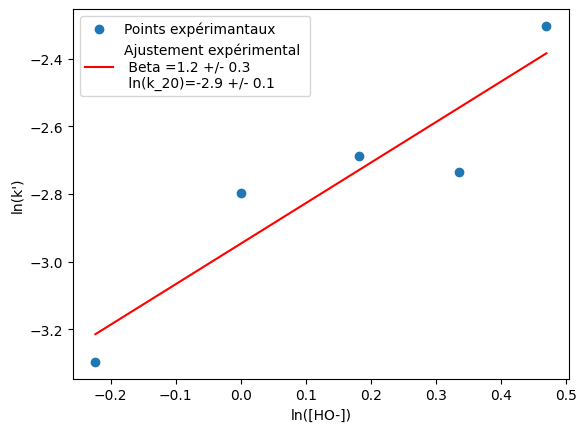

In [199]:
OH=np.log(np.array([0.8,1,1.2,1.4,1.6]))
k_20=np.log(np.array([0.037,0.061,0.068,0.065,0.1]))
plt.scatter(OH,k_20,label="Points expérimantaux")

param2,pcov2=curve_fit(linear_function,xdata=OH,ydata=k_20)
(Beta,lnk)=(param2[0],param2[1])
incerti=np.sqrt(np.diag(pcov2))
(betai,lnki)=(incerti[0],incerti[1])

plt.plot(OH,linear_function(OH,Beta,lnk),c='r',label=f"Ajustement expérimental \n Beta ={round(Beta,1)} +/- {round(betai,1)} \n ln(k_20)={round(lnk,1)} +/- {round(lnki,1)}")

plt.xlabel('ln([HO-])')
plt.ylabel('ln(k\')')
plt.legend()
plt.savefig("Ln(k).eps",format='eps',dpi=100,bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


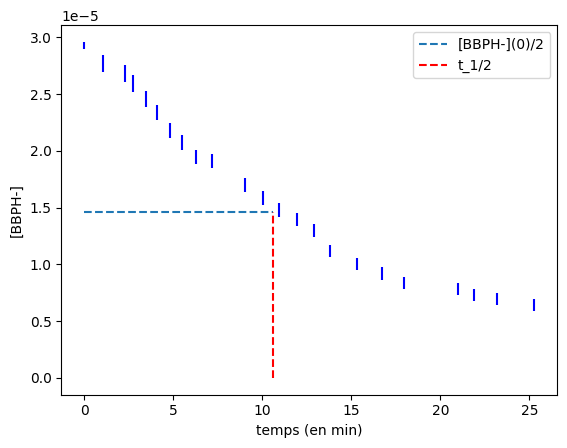

In [175]:
plt.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(BBP),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(BBP),fmt='None',ecolor='b')
plt.hlines(unumpy.nominal_values(BBP[0]/2),xmin=0,xmax=10.6,label='[BBPH-](0)/2',linestyles='--')
plt.vlines(10.6,ymin=0,ymax=unumpy.nominal_values(BBP[0]/2),label='t_1/2',linestyles='--',colors='r')
plt.xlabel('temps (en min)')
plt.ylabel('[BBPH-]')
plt.legend()
plt.savefig("demivie.eps",format='eps',dpi=100,bbox_inches='tight')
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_3512\1562161753.py:34: RuntimeWarning: invalid value encountered in sqrt
  incer=np.diag(np.sqrt(pcov))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


-0.016222859717268574 0.0007911866607330006


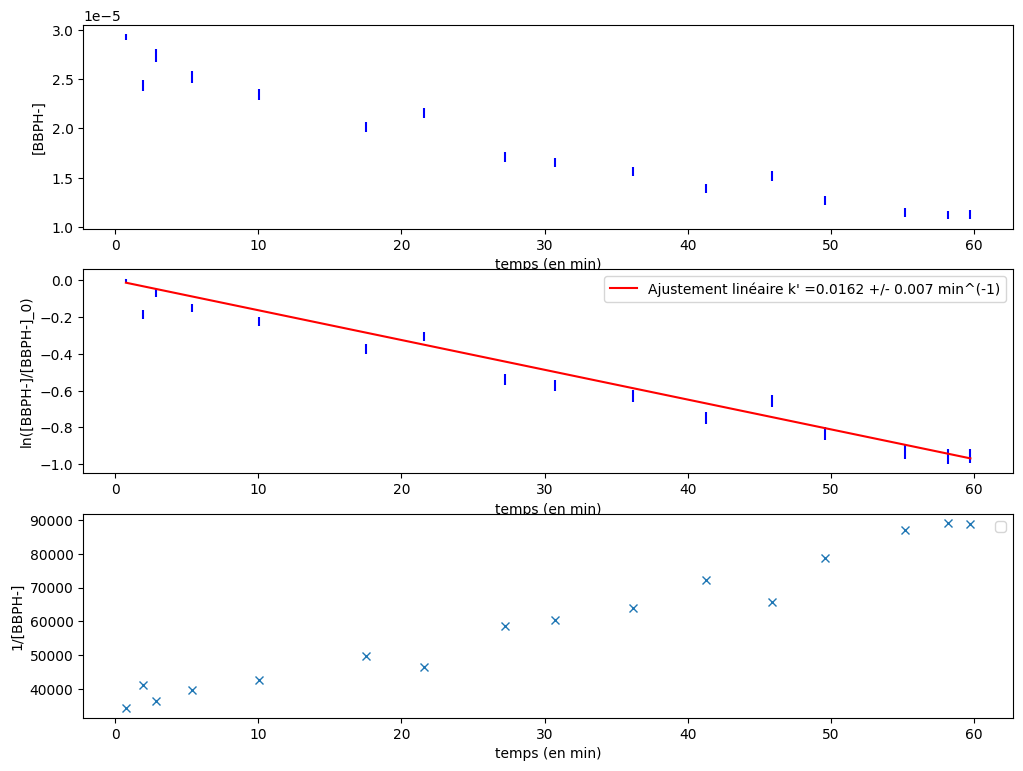

In [209]:
C=ufloat(2.93*10**(-5),0.03*10**(-5))

absorbance1=df2['Absorbance2'].values
absorbance1=unumpy.uarray(absorbance1,0.02)

temps1=df2['Temps2 '].values
t1=temps1/60
t1=unumpy.uarray(t1,2/60)
epsilon=absorbance1[0]/C

BBP=absorbance1/epsilon


fig,(ax1,ax2,ax3)=plt.subplots(3,figsize=(12,9))

ax1.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(BBP),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(BBP),fmt='None',ecolor='b')
ax2.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(unumpy.log(BBP/BBP[0])),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(unumpy.log(BBP)),fmt='None',ecolor='b')
ax3.errorbar(unumpy.nominal_values(t1),unumpy.nominal_values(1/BBP),xerr=unumpy.std_devs(t1),yerr=unumpy.std_devs(unumpy.log(1/BBP)),fmt='x',ecolor='b')


ax1.set_xlabel('temps (en min)')
ax2.set_xlabel('temps (en min)')
ax3.set_xlabel('temps (en min)')

ax1.set_ylabel('[BBPH-]')
ax2.set_ylabel('ln([BBPH-]/[BBPH-]_0)')
ax3.set_ylabel('1/[BBPH-]')


param,pcov=curve_fit(linear_function,xdata=unumpy.nominal_values(t1),ydata=unumpy.nominal_values(unumpy.log(BBP/BBP[0])),sigma=unumpy.std_devs(unumpy.log(BBP)))
(kprime,b)=(param[0],param[1])


incer=np.diag(np.sqrt(pcov))
kincer=incer[0]
print(kprime,kincer)
ax2.plot(unumpy.nominal_values(t1),unumpy.nominal_values(kprime)*unumpy.nominal_values(t1),c='r',label=f'Ajustement linéaire k\' =0.0162 +/- 0.007 min^(-1)')
ax2.legend()
plt.legend()
plt.savefig('DeuxièmeCourbesCinétiques.eps',format='eps',dpi=1000, bbox_inches='tight')
plt.show()

In [197]:
tableau=df2.to_latex(columns=('Absorbance2','C','tmin2'),index=False,column_format='|c|c|c|',header=('$Absorbance \pm 0.02 $','Concentration en mol/L',"Temps \pm 0.033 en min"),float_format="%.8f")
f=open("TableauCinétique2.txt",'w')
f.write(tableau)

C:\Users\flore\AppData\Local\Temp\ipykernel_3512\3337974448.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tableau=df2.to_latex(columns=('Absorbance2','C','tmin2'),index=False,column_format='|c|c|c|',header=('$Absorbance \pm 0.02 $','Concentration en mol/L',"Temps \pm 0.033 en min"),float_format="%.8f")


1391

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


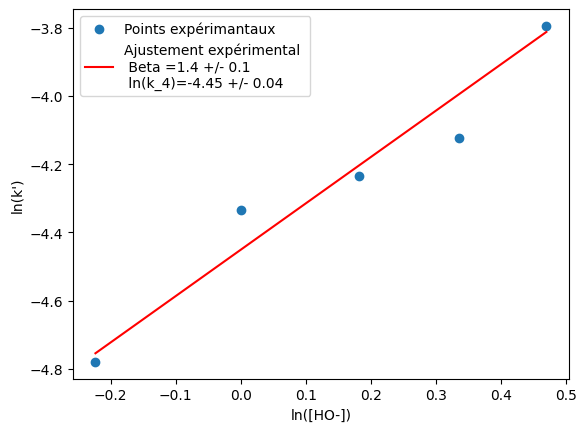

In [206]:
OH=np.log(np.array([0.8,1,1.2,1.4,1.6]))
k_20=np.log(np.array([0.0084,0.0131,0.0145,0.0162,0.0225]))
k_4incer=np.array([0.0004,0.0005,0.0004,0.0007,0.0003])/np.abs(k_20)
plt.scatter(OH,k_20,label="Points expérimantaux")
plt.errorbar(OH,k_20,yerr=k_4incer,fmt='None')

param2,pcov2=curve_fit(linear_function,xdata=OH,ydata=k_20,sigma=k_4incer)
(Beta,lnk)=(param2[0],param2[1])
incerti=np.sqrt(np.diag(pcov2))
(betai,lnki)=(incerti[0],incerti[1])

plt.plot(OH,linear_function(OH,Beta,lnk),c='r',label=f"Ajustement expérimental \n Beta ={round(Beta,1)} +/- {round(betai,1)} \n ln(k_4)={round(lnk,2)} +/- {round(lnki,2)}")

plt.xlabel('ln([HO-])')
plt.ylabel('ln(k\')')
plt.legend()
plt.savefig("Ln(k)2.eps",format='eps',dpi=100,bbox_inches='tight')
plt.show()